In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

## Задача 1. 

Поиграемся с датасетом про диабет (он совсем легкий). 

In [2]:
data = pd.read_csv('D:\\datasets\\Diabetes Binary Classification.csv')
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0] / data.shape[0]
print(f'{missing_values * 100} %')

Series([], dtype: float64) %


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number_of_times_pregnant                                                  768 non-null    int64  
 1   Plasma_glucose_concentration_a_2_hours_in_an_oral_glucose_tolerance_test  768 non-null    int64  
 2   Diastolic_blood_pressure_(mm_Hg)                                          768 non-null    int64  
 3   Triceps_skin_fold_thickness_(mm)                                          768 non-null    int64  
 4   2-Hour_serum_insulin_(mu_U/ml)                                            768 non-null    int64  
 5   Body_mass_index_(weight_in_kg/(height_in_m)^2)                            768 non-null    float64
 6   Diabetes_pedigree_function                                         

In [8]:
data.columns = [column.replace(" ", "_") for column in data.columns] 

In [12]:
data.rename(columns = {'Class_variable_(0_or_1)':'Class_variable'}, inplace = True)

<Axes: >

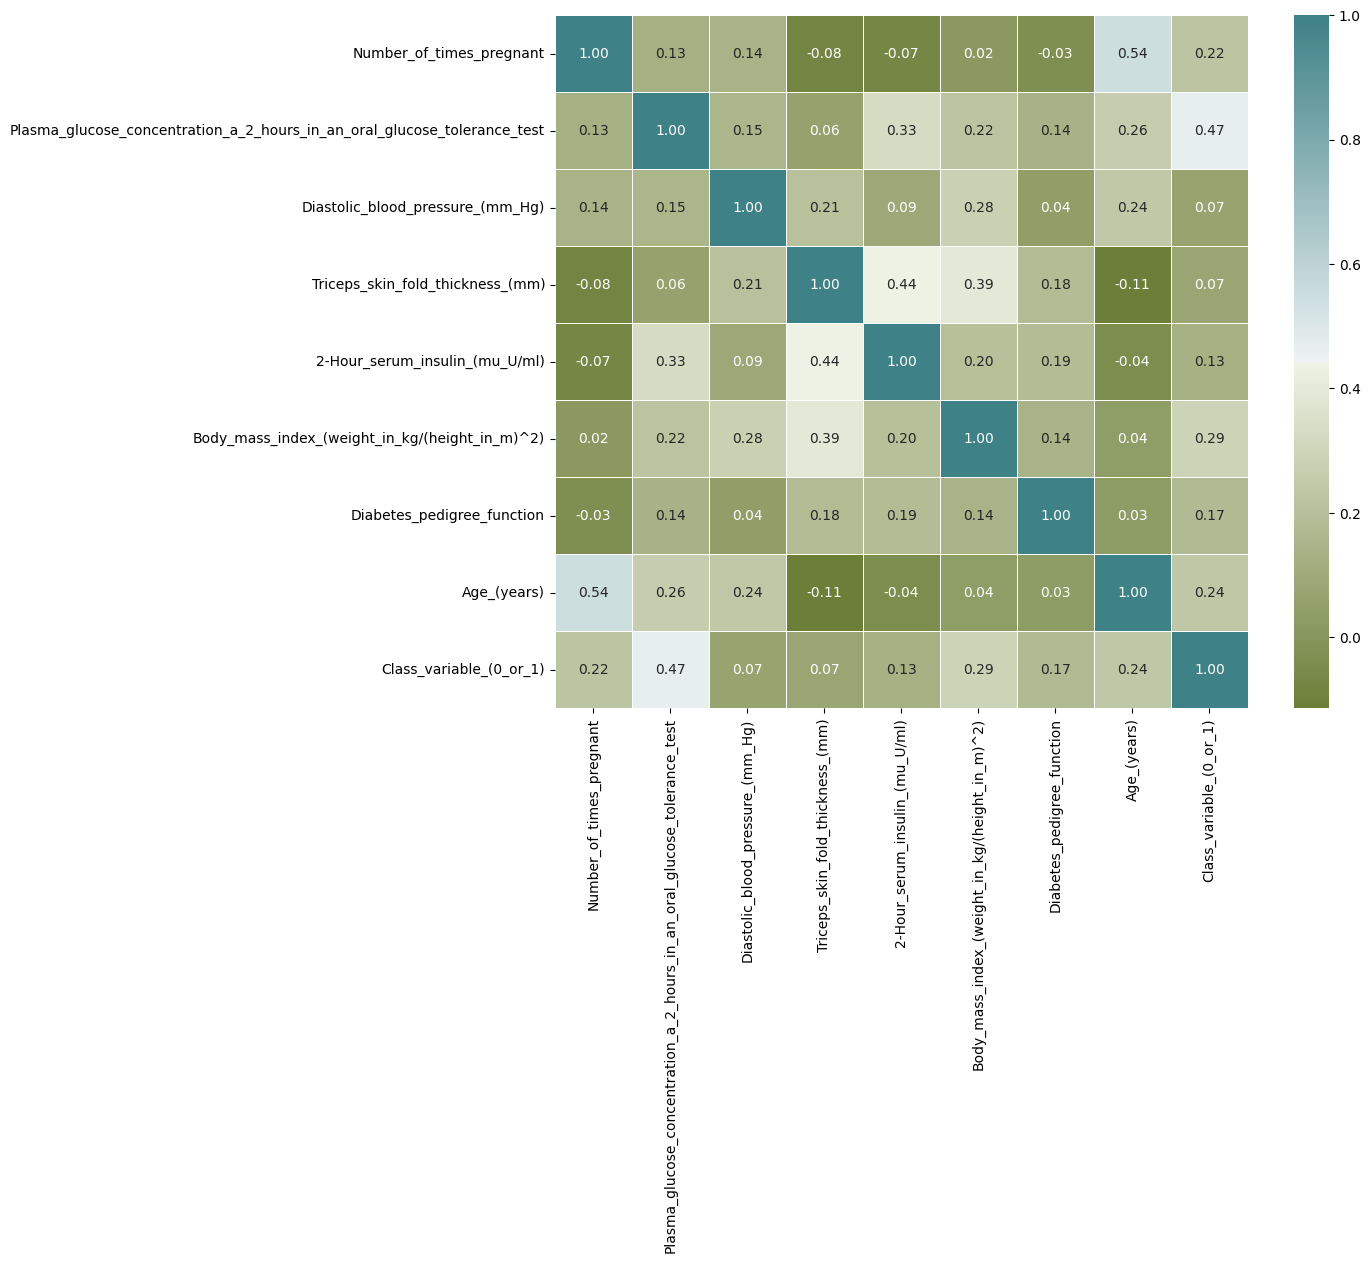

In [9]:
plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)


In [23]:
X = data.drop('Class_variable', axis=1)
y = data.Class_variable
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
y.value_counts()

Class_variable
0    500
1    268
Name: count, dtype: int64

In [16]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       418
           1       0.59      0.75      0.66       158

    accuracy                           0.79       576
   macro avg       0.74      0.78      0.75       576
weighted avg       0.81      0.79      0.80       576
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       136
           1       0.59      0.70      0.64        56

    accuracy                           0.77       192
   macro avg       0.73      0.75      0.74       192
weighted avg       0.79      0.77      0.78       192



In [17]:
X = data.drop('Class_variable', axis=1)
y = data.Class_variable
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [20]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(class_weight='balanced'))]) #это разделение на train и test со stratify
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       338
           1       0.74      0.62      0.67       238

    accuracy                           0.75       576
   macro avg       0.75      0.73      0.74       576
weighted avg       0.75      0.75      0.75       576
               precision    recall  f1-score   support

           0       0.74      0.86      0.80       108
           1       0.78      0.62      0.69        84

    accuracy                           0.76       192
   macro avg       0.76      0.74      0.74       192
weighted avg       0.76      0.76      0.75       192



In [21]:
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y)
weights = compute_class_weight('balanced', classes=classes, y=y)
class_weights = {k: v for k, v in zip(classes, weights)}
print('Class weights:', class_weights)

Class weights: {0: 0.768, 1: 1.4328358208955223}


In [24]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(class_weight={0: 0.768, 1: 1.4328358208955223}))]) 
#хотела посмотреть, будет ли разница, если по-разному задавать class weights, разницы не обнаружено) результат отличается от верхнего из-за того, что здесь был stratify при разделении 
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       332
           1       0.76      0.65      0.70       244

    accuracy                           0.76       576
   macro avg       0.76      0.75      0.75       576
weighted avg       0.76      0.76      0.76       576
               precision    recall  f1-score   support

           0       0.75      0.85      0.80       117
           1       0.71      0.55      0.62        75

    accuracy                           0.73       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.73      0.73      0.73       192



Целевая переменная тут явно обозначена как Class variable (очевидно, есть у человека диабет или нет)

## Задача 2. 

Второй датасет - про покупателей велосипедов. 

In [54]:
data = pd.read_csv(r'D:\\datasets\\bike_buyers_clean.csv')
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [57]:
data.columns = [column.replace(" ", "_") for column in data.columns] 

In [58]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0] / data.shape[0]
print(f'{missing_values * 100} %')

Series([], dtype: float64) %


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Marital_Status    1000 non-null   object
 1   Income            1000 non-null   int64 
 2   Children          1000 non-null   int64 
 3   Education         1000 non-null   object
 4   Home_Owner        1000 non-null   object
 5   Cars              1000 non-null   int64 
 6   Commute_Distance  1000 non-null   object
 7   Region            1000 non-null   object
 8   Age               1000 non-null   int64 
 9   Purchased_Bike    1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [60]:
set(data.Region)

{'Europe', 'North America', 'Pacific'}

In [50]:
data.sample(20)

,ID,Marital_Status,Gender,Income,Children,Education,Home_Owner,Cars,Commute_Distance,Region,Age,Purchased_Bike,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual
867,26693,1,1,70000,3,3,1,1,4,North America,49,0,False,False,True,False
458,21560,1,1,120000,0,1,1,4,5,Pacific,32,1,False,False,True,False
283,22005,1,0,70000,5,3,0,3,4,Pacific,46,0,False,False,False,True
911,13337,1,0,80000,5,4,1,2,4,North America,64,0,True,False,False,False
406,18012,1,0,40000,1,4,1,0,1,Europe,41,0,False,False,False,True
800,15532,0,1,60000,4,4,1,2,3,North America,43,1,False,False,True,False
645,16217,0,0,60000,0,5,1,0,1,North America,39,0,False,False,False,True
306,11000,1,1,90000,2,4,1,0,2,Pacific,40,1,False,False,True,False
452,20277,1,0,30000,2,3,0,2,1,Pacific,69,0,False,False,False,False
25,12590,0,1,30000,1,4,1,0,1,Europe,63,0,False,False,False,False


In [61]:
data.Marital_Status = data.Marital_Status.apply(lambda x: 1 if x == 'Married' else 0)
data.Home_Owner = data.Home_Owner.apply(lambda x: 1 if x == 'Yes' else 0)
data.Purchased_Bike = data.Purchased_Bike.apply(lambda x: 1 if x == 'Yes' else 0)




In [62]:
def distance(miles):
    dct = {'0-1 Miles' : 1, '1-2 Miles' : 2, '2-5 Miles' : 3, '5-10 Miles' : 4, '10+ Miles' : 5}
    return dct[miles]
    
data['Commute_Distance'] = data['Commute_Distance'].apply(distance)

In [63]:
def map_education(degrees):
    dct = {'Partial High School' : 1, 'High School' : 2, 'Partial College' : 3, 'Bachelors' : 4, 'Graduate Degree' : 5}
    return dct[degrees]
    
data['Education'] = data['Education'].apply(map_education)

In [48]:
data = pd.get_dummies(data, columns=['Occupation'], drop_first=True)

In [64]:
data = pd.get_dummies(data, columns=['Region'], drop_first=True)

<Axes: >

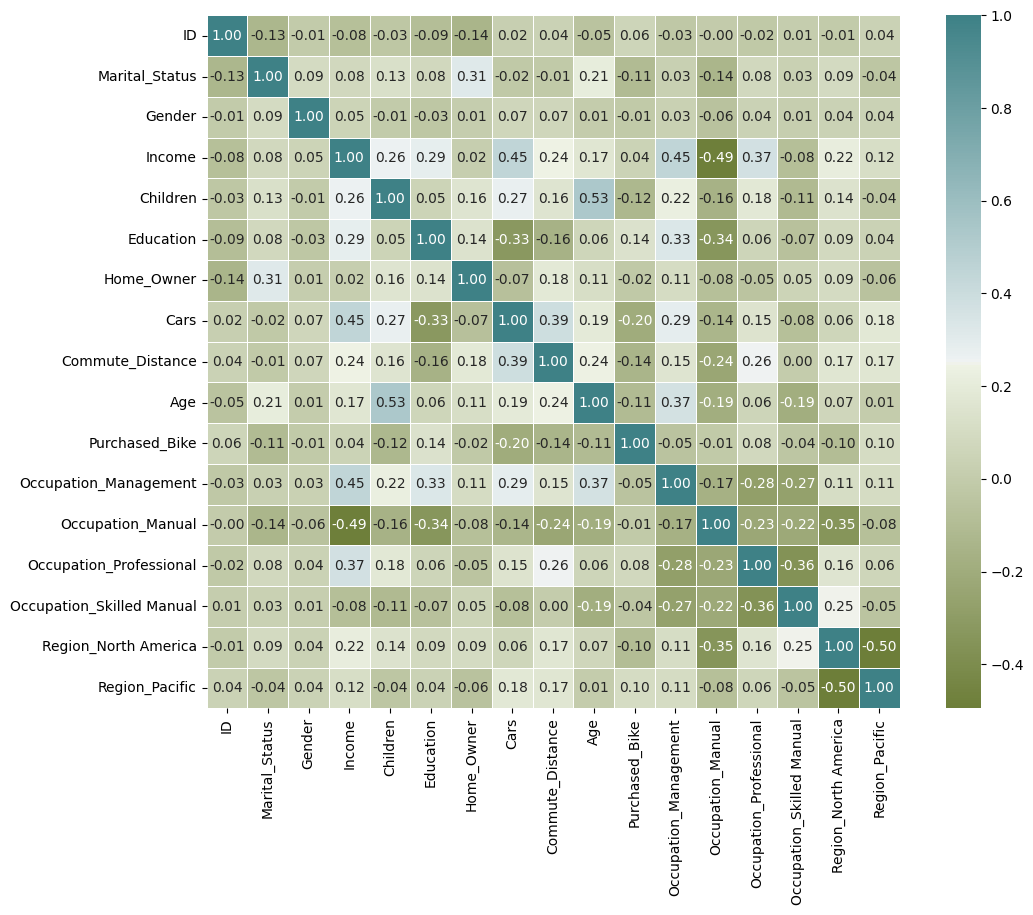

In [53]:
plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)


In [55]:
data.drop(['Occupation', 'ID', 'Gender'], axis=1, inplace=True)

<Axes: >

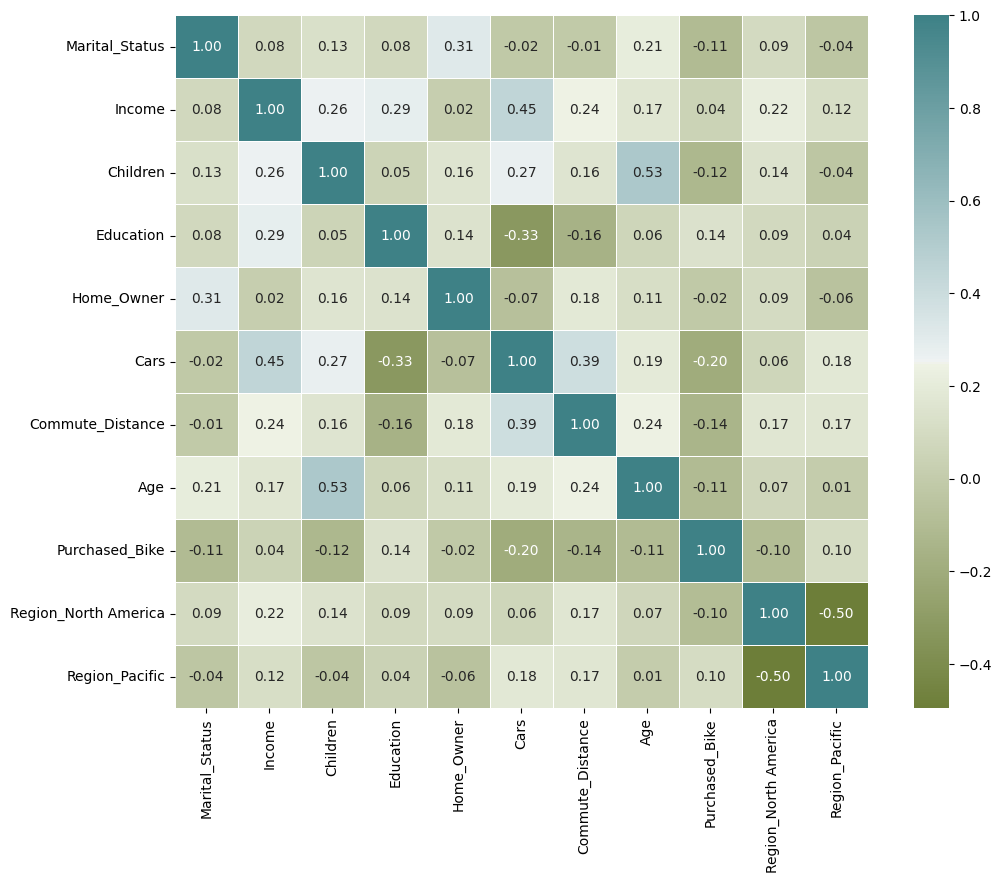

In [65]:
plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)


In [67]:
X = data.drop('Purchased_Bike', axis=1)
y = data.Purchased_Bike
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [68]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])

In [69]:
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68       417
           1       0.61      0.65      0.63       333

    accuracy                           0.66       750
   macro avg       0.66      0.66      0.66       750
weighted avg       0.66      0.66      0.66       750
               precision    recall  f1-score   support

           0       0.68      0.61      0.64       141
           1       0.55      0.62      0.59       109

    accuracy                           0.62       250
   macro avg       0.62      0.62      0.61       250
weighted avg       0.62      0.62      0.62       250



In [70]:
y.value_counts() 

Purchased_Bike
0    519
1    481
Name: count, dtype: int64

In [72]:
from sklearn.model_selection import GridSearchCV #я нагуглила, как добавить регуляризацию к логистической регрессии, но она не помогла

log_reg = LogisticRegression(solver='liblinear')
C_values = {'C': np.logspace(-3, 3, 10)}
logreg_grid = GridSearchCV(log_reg, C_values, cv=5, scoring='f1')
logreg_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='f1')

In [73]:
print(logreg_grid.best_params_)
print(logreg_grid.best_score_)

{'C': 0.1}
0.606578115319991


In [74]:
log_reg = LogisticRegression(solver='liblinear', penalty='l1')

C_values = {'C': np.logspace(-3, 3, 10)}
logreg_grid = GridSearchCV(log_reg, C_values, cv=5, scoring='f1')
logreg_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='f1')

In [75]:
print(logreg_grid.best_params_)
print(logreg_grid.best_score_)

{'C': 46.41588833612773}
0.6151623880282596


Пытаемся по характеристикам человека понять, купит он велик или нет. 